<a href="https://colab.research.google.com/github/Megh-Zyke/EECS-542-Nystrom-Approximation/blob/main/N_Cut_Nystrom_Appx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.linalg import eigh
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans


Creating Synthetic data of a graph with 4 Clusters and demonstrate how the eigen Vectors help in segmenting the graphs into disjoint subsets, such that the relative weight of the disjoint graphs to the total weight is minimized

In [3]:
# Generate synthetic data with 4 clusters
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

$W_{ij} = exp( -\frac{||X_i - X_j||^2}{2*{gamma}^2}  )$

This is $W$ the similarity Matrix we compute using the rbf kernel functoin, the affinity/similarity matrix based on Gaussian distances

In [5]:
# Compute the similarity matrix using RBF (Gaussian) kernel
sigma = 1.0
W = rbf_kernel(X, gamma=1/(2*sigma**2))

$D$ is the Diagonal matrix which carries the similarity matrix of the similarity matrix


$L$ is the Graph Laplacian

In [6]:
# Degree matrix
D = np.diag(np.sum(W, axis=1))

# Unnormalized Laplacian
L = D - W

$D^{-1}$ is computed in the first line of the code

$L_{sym} = D^{-1}LD^{-1}$

Finally we compute the eigen vectors of $L_{sym}$

In [7]:
# Normalized Laplacian (symmetric)
D_inv_sqrt = np.linalg.inv(np.sqrt(D))
L_sym = np.dot(np.dot(D_inv_sqrt, L), D_inv_sqrt)

# Compute the eigenvalues and eigenvectors of the normalized Laplacian
eigvals, eigvecs = eigh(L_sym)

In [11]:
print(len(eigvecs))

400


From the graph it is evident that the second smallest Eigen Vector(Fiedler vector) provides the solution to the relaxed NCut problem

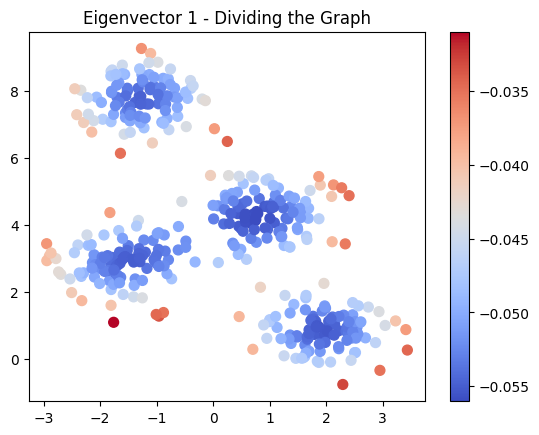

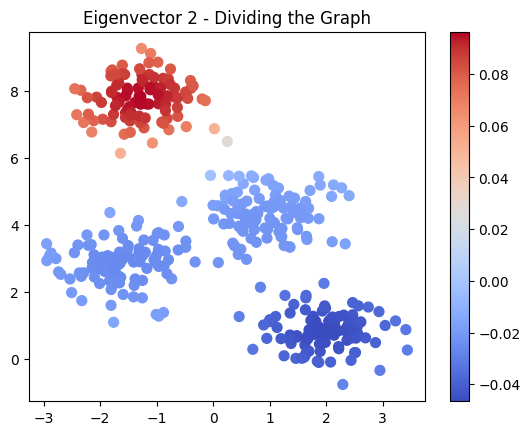

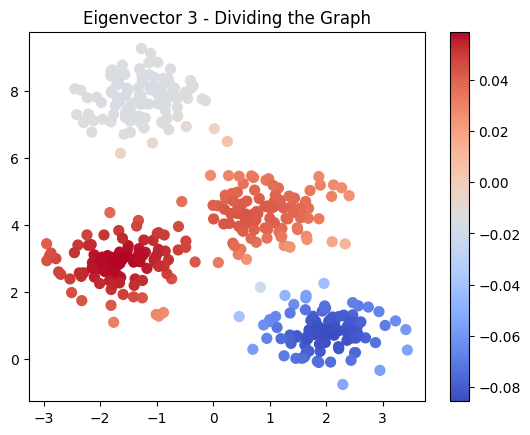

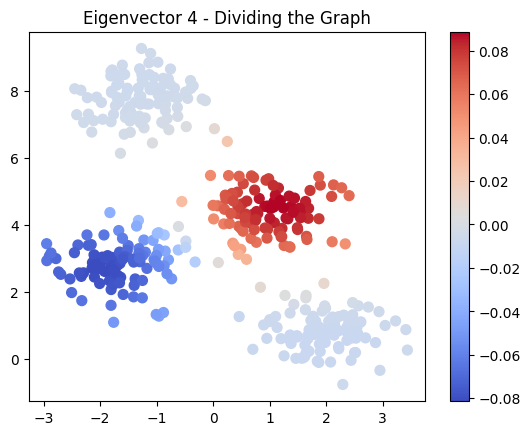

In [8]:
# Plot the first few eigenvectors
k = 4  # number of clusters
for i in range(1, k+1):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=eigvecs[:, i-1], s=50, cmap='coolwarm')
    plt.title(f"Eigenvector {i} - Dividing the Graph")
    plt.colorbar()
    plt.show()

# Use the first k eigenvectors to form a matrix U
U = eigvecs[:, :k]

# Normalize U
U_norm = U / np.linalg.norm(U, axis=1, keepdims=True)

# Perform k-means clustering on U_norm
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(U_norm)

Each subsequent eigenvector can be used to further partition the graph into subclusters. The process is as follows:

- Compute the symmetric normalized Laplacian $L_{sym}$
- Compute the eigenvectors $x_1,x_2,....,x_k$
 corresponding to the smallest $k$
 eigenvalues.
- Use $x_2$
 (the Fiedler vector) to divide the graph into two clusters.
- For multi-way clustering, use the next eigenvectors
 to further hierarchically subdivide these clusters.

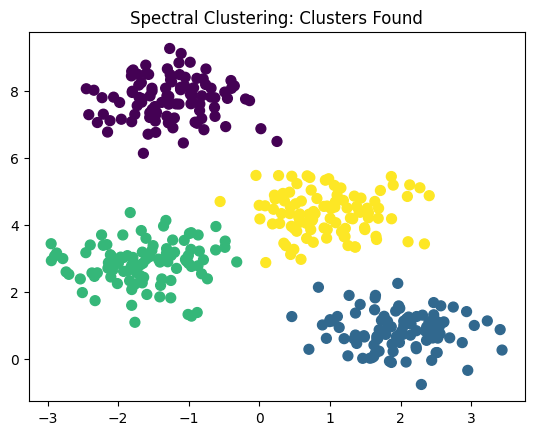

In [9]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Spectral Clustering: Clusters Found")
plt.show()